In [76]:
# 1 Text similarity
import numpy as np
import re
from scipy.spatial import distance

In [77]:
text = open('sentences.txt', 'r')
text

<open file 'sentences.txt', mode 'r' at 0x7f4e0c146660>

In [78]:
lines = [[word for word in re.split('[^a-z]', line.lower()) if word] for line in text]
all_words_set = set((word for sentence in lines for word in sentence ))

all_words = {i:word for (i, word) in enumerate(list(all_words_set))}
print all_words

{0: 'displays', 1: 'osx', 2: 'selection', 3: 'safari', 4: 'just', 5: 'developed', 6: 'over', 7: 'vermin', 8: 'domestic', 9: 'named', 10: 'installed', 11: 'symbols', 12: 'through', 13: 'human', 14: 'world', 15: 'disk', 16: 'its', 17: 'fifth', 18: 'features', 19: 'tamed', 20: 'upgrade', 21: 'lb', 22: 'drive', 23: 'to', 24: 'won', 25: 'deliberately', 26: 'marks', 27: 'has', 28: 'predecessor', 29: 'non', 30: 'which', 31: 'read', 32: 'october', 33: 'every', 34: 'os', 35: 'they', 36: 'not', 37: 'during', 38: 'now', 39: 'possess', 40: 'intel', 41: 'keyboards', 42: 'bytes', 43: 'unnecessary', 44: 'patch', 45: 'predators', 46: 'small', 47: 'output', 48: 'entirely', 49: 'where', 50: 'ears', 51: 'available', 52: 'on', 53: 'often', 54: 'sequence', 55: 'some', 56: 'lion', 57: 'frequency', 58: 'are', 59: 'year', 60: 'download', 61: 'terms', 62: 'concern', 63: 'error', 64: 'for', 65: 'pipes', 66: 'since', 67: 'factory', 68: 'artificial', 69: 'content', 70: 'version', 71: 'run', 72: 'between', 73: 'ne

In [79]:
count = [[lines[i].count(all_words[j]) for j in xrange(len(all_words))] for i in xrange(len(lines)) ]

In [80]:
np_count = np.array(count)
np_count.shape[0]

22

In [81]:
cosine_distances = [(scipy.spatial.distance.cosine(np_count[0, ], np_count[i, ]), i) for i in xrange(1,np_count.shape[0])]

In [82]:
sorted_distances =sorted(cosine_distances)
sorted_distances

[(0.7327387580875756, 6),
 (0.77708871496985887, 4),
 (0.82503644694405864, 21),
 (0.83281653622739416, 10),
 (0.83964325485254543, 12),
 (0.84063618542208085, 16),
 (0.84275727449171223, 20),
 (0.86447381456421235, 2),
 (0.87035925528956715, 13),
 (0.87401184233025764, 14),
 (0.88047713906656067, 11),
 (0.88427248752843102, 8),
 (0.88854435748492944, 19),
 (0.89517151632780823, 3),
 (0.90550888174769317, 9),
 (0.92587506833388988, 7),
 (0.94023856953328033, 5),
 (0.94427217874246472, 15),
 (0.94427217874246472, 18),
 (0.95275444087384664, 1),
 (0.95664450152379399, 17)]

In [84]:
print ' '.join(lines[0])
print ' '.join(lines[6])
print ' '.join(lines[4])

in comparison to dogs cats have not undergone major changes during the domestication process
domestic cats are similar in size to the other members of the genus felis typically weighing between and kg and lb
in one people deliberately tamed cats in a process of artificial selection as they were useful predators of vermin


In [172]:
#2 Approximation
%matplotlib inline
import math
import matplotlib.pyplot as plt


In [177]:
# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

def f(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5 * math.exp(-x / 2.)

def polynom(coefs):
    def poly(x):
        return sum((coef* x**i for (i, coef) in enumerate(coefs)))
    return poly

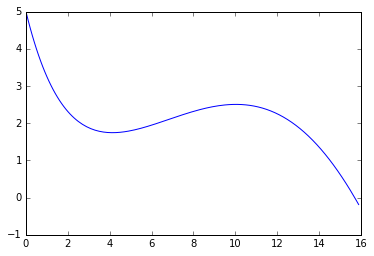

In [178]:
x_val = np.arange(0, 16, 0.1)
y_val = np.array([f(x) for x in x_val])
plt.plot(x_val, y_val)
plt.show()

In [179]:
# First degree polynom
A =  np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])

In [180]:
import scipy
from scipy import linalg
coefs1 = linalg.solve(A, b)
coefs1

array([ 3.43914511, -0.18692825])

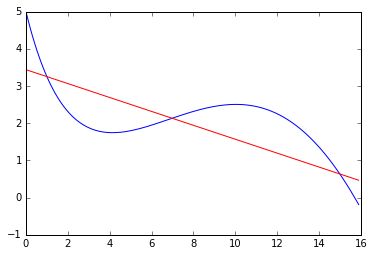

In [182]:
polynom1 = polynom(coefs1)
y_new1 = np.array(polynom1(x_val))
plt.plot(x_val, y_val,'b',x_val, y_new1, 'r')
plt.show()

In [183]:
# Second degree
A2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b2 = np.array([f(1), f(8), f(15)])
coefs2 = linalg.solve(A2, b2)
coefs2

array([ 3.32512949, -0.06531159, -0.00760104])

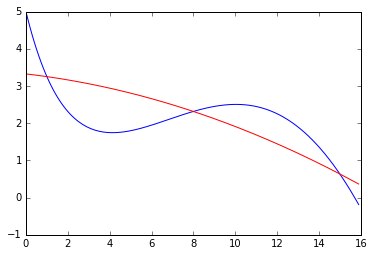

In [184]:
polynom2 = polynom(coefs2)
y_new2 = np.array(polynom2(x_val))
plt.plot(x_val, y_val,'b',x_val, y_new2, 'r')
plt.show()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


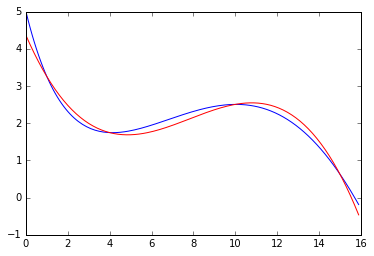

In [187]:
# Third degree
A3 = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b3 = np.array([f(1), f(4), f(10), f(15)])
coefs3 = linalg.solve(A3, b3)
print coefs3
polynom3 = polynom(coefs3)
y_new3 = np.array(polynom3(x_val))
plt.plot(x_val, y_val,'b',x_val, y_new3, 'r')
plt.show()